In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
a=datetime.now()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

import re
from sklearn.feature_extraction.text import CountVectorizer


# <font color = 'chartreuse'> Import, Clean Data

In [3]:
with open("constitution.txt","r", encoding="utf-8") as f:
    corpus = f.read()

corpus=re.sub(r"\n"," ",corpus)

# stops = stopwords.words("english")
print(len(corpus.split(' ')))

#word ~ 7505 words
# python split() ~ 7641 

def clean_stops(doc,stops):
    #regex scrubber:
    final=[]
    clean=re.sub(r"AC\/\d{1,4}\/\d{1,4}", "",doc)
    # clean=clean.translate(str.maketrans("","",string.punctuation))
    for token in clean.split():
        if token not in stops:
            final.append(token)

    final=" ".join(final)
    return final

def clean_docs(docs):
    stops = stopwords.words("english")
    final=[]
    for doc in docs:
        final.append(clean_stops(doc,stops))
    return final

clean = clean_docs(corpus.split())

clean_sents = clean_docs(corpus.split("."))


7641


# <font color = 'chartreuse'> Vectorize Corpus:

In [26]:
cv = CountVectorizer()
CV1 = cv.fit_transform(clean_sents)
vectorizer = TfidfVectorizer(lowercase=True, 
                             max_features=50, 
                             max_df = 0.8,
                             min_df = 5, 
                             ngram_range=(1,5),
                             stop_words = "english")

vectors = vectorizer.fit_transform(clean_sents)

feature_names = vectorizer.get_feature_names_out()
print(feature_names)

dense = vectors.todense()
dense_list = dense.tolist()

print(len(dense_list[1]))

['amendment' 'article' 'case' 'cases' 'citizens' 'congress'
 'congress shall' 'constitution' 'duties' 'electors' 'executive' 'house'
 'house representatives' 'law' 'laws' 'legislature' 'majority' 'make'
 'number' 'office' 'person' 'persons' 'power' 'powers' 'president'
 'president shall' 'provide' 'public' 'representatives' 'right' 'section'
 'senate' 'senators' 'shall power' 'state' 'state shall' 'states'
 'states shall' 'thereof' 'thirds' 'time' 'united' 'united states'
 'united states shall' 'unless' 'vice' 'vice president' 'vote' 'votes'
 'years']
50


# <font color = 'chartreuse'> KMeans, PCA `n_components=2` </font>

In [27]:
from sklearn.decomposition import PCA


TRUE_K = 3
model = KMeans(n_clusters=TRUE_K, init="k-means++", max_iter=100, n_init=1)
model.fit(vectors)
kmean_indices = model.fit_predict(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

# Print Cluster LIMIT 15:
i = 0
for cluster in order_centroids:
    print (f"Cluster {i+1}")
    for keyword in cluster[:15]:
    # for keyword in cluster[0:10]:
        print ('\t',terms[keyword])
    print ("")
    i=i+1

Cluster 1
	 president
	 vice president
	 vice
	 office
	 senate
	 president shall
	 number
	 representatives
	 house
	 house representatives
	 person
	 votes
	 case
	 united
	 united states

Cluster 2
	 states
	 united
	 united states
	 state
	 constitution
	 section
	 years
	 states shall
	 amendment
	 citizens
	 united states shall
	 article
	 congress
	 office
	 law

Cluster 3
	 state
	 congress
	 congress shall
	 law
	 house
	 power
	 section
	 amendment
	 article
	 shall power
	 unless
	 time
	 cases
	 public
	 persons



# <font color = 'chartreuse'> K-Mean Centroid Viz

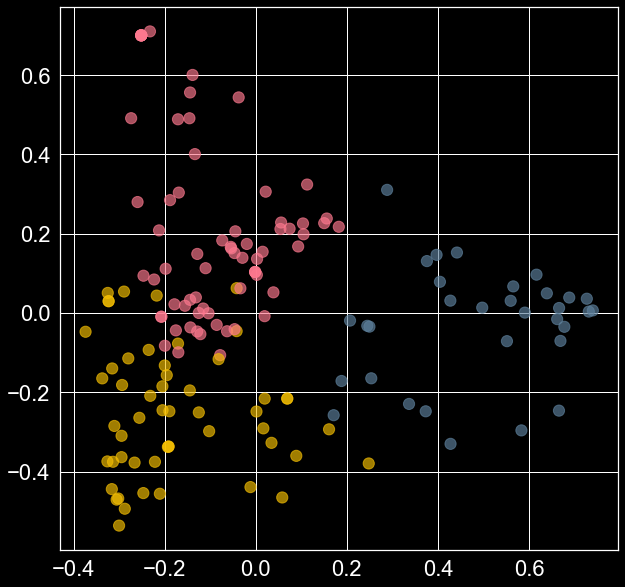

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2.0)
sns.set_palette("magma")
import pylab
pylab.rcParams['figure.figsize'] = (20, 20)
plt.style.use('dark_background')
# import RCG
# colors = list(RCG.nhex(int(TRUE_K)).values)
colors = ["#5e819d","#f5bf03","#fd798f"]
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
# colors=["#aa23ff","#ae7181", "#04d8b2", "#5170d7","#ff9408"]
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices],s=125,alpha=0.66)



# for i, txt in enumerate(names):
#     ax.annotate(txt[0:5], (x_axis[i],y_axis[i]))
    
plt.savefig("KMeans_3_USA_Constitution.png",dpi=122)
plt.show()



# <font color = 'slateblue'> exhaustive cluster print:

In [29]:
# Print Cluster LIMIT 15:
i = 0
for cluster in order_centroids:
    print (f"Cluster {i+1}")
    for keyword in cluster[:]:
    # for keyword in cluster[0:10]:
        print ('\t',terms[keyword])
    print ("")
    i=i+1

Cluster 1
	 president
	 vice president
	 vice
	 office
	 senate
	 president shall
	 number
	 representatives
	 house
	 house representatives
	 person
	 votes
	 case
	 united
	 united states
	 duties
	 states
	 majority
	 powers
	 section
	 electors
	 congress
	 states shall
	 vote
	 united states shall
	 persons
	 amendment
	 provide
	 right
	 law
	 article
	 senators
	 state
	 years
	 thirds
	 state shall
	 shall power
	 unless
	 make
	 power
	 time
	 congress shall
	 executive
	 legislature
	 citizens
	 thereof
	 laws
	 constitution
	 cases
	 public

Cluster 2
	 states
	 united
	 united states
	 state
	 constitution
	 section
	 years
	 states shall
	 amendment
	 citizens
	 united states shall
	 article
	 congress
	 office
	 law
	 thereof
	 person
	 president
	 vote
	 state shall
	 laws
	 time
	 executive
	 right
	 power
	 unless
	 legislature
	 senators
	 thirds
	 votes
	 cases
	 senate
	 representatives
	 president shall
	 public
	 powers
	 duties
	 provide
	 make
	 majority
	 elect